# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
# data in form transaction list
data = [['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

df = pd.DataFrame(data)
df = pd.get_dummies(df.stack()).sum(level=0)
print(df)

    beef  butter  butter milk  canned beer  cling film/bags  curd  \
0      0       0            0            0                0     0   
1      0       0            0            0                0     0   
2      0       0            0            0                0     0   
3      0       0            0            1                0     0   
4      0       0            0            0                0     0   
5      0       0            0            0                0     0   
6      0       0            0            0                0     0   
7      0       0            0            0                0     0   
8      0       0            0            0                0     1   
9      1       0            0            0                0     0   
10     0       1            0            0                0     0   
11     0       0            0            0                0     0   
12     0       0            0            0                0     0   
13     0       0            1     

<ipython-input-3-0f928d2872f2>:24: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df = pd.get_dummies(df.stack()).sum(level=0)


In [4]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# data in the transaction list
data = [    ['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

# mengonversi data ke format pengkodean one - hot
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# temukan itemsets (support) yang sering muncul dengan Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# temukan association rules dengan Association Rule Mining algorithm
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# buat table of support untuk itemsets
df_support = frequent_itemsets
df_support['support'] = df_support['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_support = df_support.rename(columns={"itemsets": "itemset"})
df_support = df_support.set_index('itemset')
print(df_support)

# buat table of support dan confidence for rules
df_rules = pd.DataFrame(rules, columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'])

# filter rules dengan hanya 1 antecedent dan 1 consequent
df_rules = df_rules[df_rules['antecedents'].apply(lambda x: len(x) == 1) & df_rules['consequents'].apply(lambda x: len(x) == 1)]

# format antecedent dan consequent kolom
df_rules['antecedents'] = df_rules['antecedents'].apply(lambda x: list(x)[0])
df_rules['consequents'] = df_rules['consequents'].apply(lambda x: list(x)[0])

# tetapkan antecedent sebagai indeks dan urutkan berdasarkan confidence
df_rules = df_rules.set_index('antecedents')
df_rules = df_rules.sort_values(by=['confidence'], ascending=False)

# membuat tabel support dan confidence untuk filtered rules
df_rules = df_rules[['consequents', 'support', 'confidence']]
df_rules['support'] = df_rules['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_rules['confidence'] = df_rules['confidence'].apply(lambda x: "{:.2f}%".format(x*100))
print("\n")
print("HASIL SUPPORT DAN CONFIDENCE")
print("\n")

print(df_rules)


                                                   support
itemset                                                   
(beef)                                               5.26%
(butter)                                             5.26%
(butter milk)                                        5.26%
(canned beer)                                        5.26%
(cling film/bags)                                    5.26%
...                                                    ...
(sausage, whole milk, semi-finished bread)           5.26%
(sausage, yogurt, semi-finished bread)               5.26%
(sausage, whole milk, yogurt)                        5.26%
(whole milk, yogurt, semi-finished bread)            5.26%
(sausage, whole milk, yogurt, semi-finished bread)   5.26%

[65 rows x 1 columns]


HASIL SUPPORT DAN CONFIDENCE


                             consequents support confidence
antecedents                                                
white bread                         beef   5.26%    100.0

In [5]:
import pandas as pd
import math

# Membuat data frame
df = pd.read_csv('deteksi_uang_palsu.csv')

# Menentukan target prediksi
target = {'height_left': 172.25,
          'height_right': 103.94,
          'margin_low': 103.68,
          'margin_up': 4.14,
          'length': 3.25}

# Membuat kolom jarak
df['jarak'] = df.apply(lambda x: math.sqrt((x['height_left'] - target['height_left'])**2 + 
                                           (x['height_right'] - target['height_right'])**2 + 
                                           (x['margin_low'] - target['margin_low'])**2 + 
                                           (x['margin_up'] - target['margin_up'])**2 + 
                                           (x['length'] - target['length'])**2), axis=1)

# Menampilkan tabel jarak
print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
1        True    171.66       103.68        103.41        4.35       3.33   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   
4        True    171.79       104.57        104.04        4.26       3.15   
5       False    172.00       104.23        104.52        5.76       3.37   
6       False    171.56       104.03        103.93        5.47       3.50   
7       False    171.90       104.33        104.40        4.70       3.31   
8       False    171.84       104.06        104.10        4.87       3.25   
9       False    172.11       104.14        104.15        4.84       3.28   

   length       jarak  
0  113.02  162.985541  
1  113.74  163.637621  
2  113.12  163.039278  
3  113.30  163.154696  
4  113.46  163.132317  
5  110.9

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

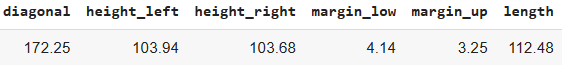
<!-- 1412 -->

In [6]:
import pandas as pd
import math

In [7]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

# Membuat data frame
df = pd.read_csv('deteksi_uang_palsu.csv')

# Menentukan target prediksi
target = {'height_left': 172.25,
          'height_right': 103.94,
          'margin_low': 103.68,
          'margin_up': 4.14,
          'length': 3.25}

# Membuat kolom jarak
df['jarak'] = df.apply(lambda x: math.sqrt((x['height_left'] - target['height_left'])**2 + 
                                           (x['height_right'] - target['height_right'])**2 + 
                                           (x['margin_low'] - target['margin_low'])**2 + 
                                           (x['margin_up'] - target['margin_up'])**2 + 
                                           (x['length'] - target['length'])**2), axis=1)

# Menampilkan tabel jarak
print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
1        True    171.66       103.68        103.41        4.35       3.33   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   
4        True    171.79       104.57        104.04        4.26       3.15   
5       False    172.00       104.23        104.52        5.76       3.37   
6       False    171.56       104.03        103.93        5.47       3.50   
7       False    171.90       104.33        104.40        4.70       3.31   
8       False    171.84       104.06        104.10        4.87       3.25   
9       False    172.11       104.14        104.15        4.84       3.28   

   length       jarak  
0  113.02  162.985541  
1  113.74  163.637621  
2  113.12  163.039278  
3  113.30  163.154696  
4  113.46  163.132317  
5  110.9

In [8]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

# load data
df = pd.read_csv("deteksi_uang_palsu.csv")

# hitung jarak dari setiap data 
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]
jarak = []
for i in range(len(df)):
    d = 0
    for j in range(1, 7):
        d += (df.iloc[i, j] - target[j-1])**2
    jarak.append(math.sqrt(d))
df['jarak'] = jarak

# urutkan data dari jarak terdekat
K = int(math.sqrt(len(df)))
df_sorted = df.sort_values(by='jarak').head(K)

# tampilkan data terurut
print(df_sorted)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   

   length     jarak  
0  113.02  0.671267  
2  113.12  0.834626  
3  113.30  0.910934  


In [9]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

# tentukan nilai K
K = round(len(df)**0.5)

# ambil K data terdekat
k_nearest_neighbors = df_sorted[:K]

# hitung label terbanyak
prediction = pd.DataFrame(k_nearest_neighbors['is_genuine'].mode())

print("Hasil prediksi: ")
print(prediction)

Hasil prediksi: 
   is_genuine
0        True


# (3) Analisis

> Nama : Chorine Jessica Utama

> Nim : 2109116061


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

#JUDUL "Health Habits of Students"
https://www.kaggle.com/datasets/mdanish12/health-habits-of-students

In [10]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
sns.set(style = 'whitegrid')
import textwrap

In [11]:
df = pd.read_csv("Students.csv")
df

,Strata,S.No.,BMI,Age,F.O.,B.P.,Religion,Meal,Extra_diet,Aowater,...,Sleep_prob,yearly_treatment,hhcndtn,x21,x22,Dust,x24,Participate_sport,Exercise,Gym
0,U.G,1,22.5,21.0,3.0,3.0,2.0,2,2.0,2.0,...,None,Never,2,2,2.0,Yes,1,Yes,Yes,30-60 min
1,U.G,2,23.1,22.0,2.0,1.0,2.0,1,4.0,2.0,...,None,More then two times,2,4,3.0,Yes,3,No,Yes,30-60 min
2,U.G,3,20.9,21.0,3.0,3.0,2.0,2,2.0,4.0,...,None,Never,2,4,3.0,Yes,2,No,Yes,30-60 min
3,U.G,4,20.2,20.0,2.0,1.0,2.0,1,1.0,3.0,...,Stress,One time,1,5,1.0,No,2,No,No,0-10 min
4,U.G,5,22.8,24.0,1.0,3.0,2.0,2,2.0,3.0,...,None,Never,2,5,4.0,No,3,Yes,Yes,30-60 min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Ph.D,24,28.7,27.0,4.0,3.0,1.0,1,4.0,2.0,...,Depression/Anxiety,Two times,2,5,2.0,No,3,No,No,10-30 min
124,Ph.D,25,21.6,24.0,3.0,1.0,2.0,2,2.0,3.0,...,None,One time,1,5,3.0,Yes,5,No,No,30-60 min
125,Ph.D,26,24.6,23.0,NaN,2.0,2.0,2,4.0,1.0,...,None,Never,5,5,3.0,No,3,No,No,0-10 min
126,Ph.D,27,21.3,24.0,3.0,4.0,1.0,4,3.0,4.0,...,None,One time,3,2,3.0,Yes,5,Yes,No,10-30 min


In [12]:
df.head()

,Strata,S.No.,BMI,Age,F.O.,B.P.,Religion,Meal,Extra_diet,Aowater,...,Sleep_prob,yearly_treatment,hhcndtn,x21,x22,Dust,x24,Participate_sport,Exercise,Gym
0,U.G,1,22.5,21.0,3.0,3.0,2.0,2,2.0,2.0,...,None,Never,2,2,2.0,Yes,1,Yes,Yes,30-60 min
1,U.G,2,23.1,22.0,2.0,1.0,2.0,1,4.0,2.0,...,None,More then two times,2,4,3.0,Yes,3,No,Yes,30-60 min
2,U.G,3,20.9,21.0,3.0,3.0,2.0,2,2.0,4.0,...,None,Never,2,4,3.0,Yes,2,No,Yes,30-60 min
3,U.G,4,20.2,20.0,2.0,1.0,2.0,1,1.0,3.0,...,Stress,One time,1,5,1.0,No,2,No,No,0-10 min
4,U.G,5,22.8,24.0,1.0,3.0,2.0,2,2.0,3.0,...,None,Never,2,5,4.0,No,3,Yes,Yes,30-60 min


In [13]:
df.tail()

,Strata,S.No.,BMI,Age,F.O.,B.P.,Religion,Meal,Extra_diet,Aowater,...,Sleep_prob,yearly_treatment,hhcndtn,x21,x22,Dust,x24,Participate_sport,Exercise,Gym
123,Ph.D,24,28.7,27.0,4.0,3.0,1.0,1,4.0,2.0,...,Depression/Anxiety,Two times,2,5,2.0,No,3,No,No,10-30 min
124,Ph.D,25,21.6,24.0,3.0,1.0,2.0,2,2.0,3.0,...,None,One time,1,5,3.0,Yes,5,No,No,30-60 min
125,Ph.D,26,24.6,23.0,NaN,2.0,2.0,2,4.0,1.0,...,None,Never,5,5,3.0,No,3,No,No,0-10 min
126,Ph.D,27,21.3,24.0,3.0,4.0,1.0,4,3.0,4.0,...,None,One time,3,2,3.0,Yes,5,Yes,No,10-30 min
127,Ph.D,28,23.5,25.0,2.0,2.0,2.0,2,2.0,1.0,...,Migraine,Two times,3,1,2.0,No,4,Yes,No,0-10 min


In [15]:
# df1 isinya dataset dengan label target 28
df1 = df[df['S.No.'] == 28]

# Menampilkan hasil filter
print(df1)

    Strata  S.No.   BMI   Age  F.O.  B.P.  Religion  Meal  Extra_diet  \
27     U.G     28  21.6  22.0   3.0   3.0       2.0     1         1.0   
86     P.G     28  29.0  22.0   2.0   1.0       2.0     2         3.0   
127   Ph.D     28  23.5  25.0   2.0   2.0       2.0     2         2.0   

     Aowater  ... Sleep_prob yearly_treatment hhcndtn  x21  x22 Dust x24  \
27       4.0  ...       None            Never       2    1  1.0  Yes   5   
86       2.0  ...       None            Never       3    5  2.0   No   3   
127      1.0  ...   Migraine        Two times       3    1  2.0   No   4   

    Participate_sport Exercise        Gym  
27                Yes      Yes  30-60 min  
86                 No       No   0-10 min  
127               Yes       No   0-10 min  

[3 rows x 34 columns]


In [16]:
# df2 isinya dataset dengan label target bukan One time
df2 = df[df['yearly_treatment'] != 'One time']

# Menampilkan hasil filter
print(df2)

    Strata  S.No.   BMI   Age  F.O.  B.P.  Religion  Meal  Extra_diet  \
0      U.G      1  22.5  21.0   3.0   3.0       2.0     2         2.0   
1      U.G      2  23.1  22.0   2.0   1.0       2.0     1         4.0   
2      U.G      3  20.9  21.0   3.0   3.0       2.0     2         2.0   
4      U.G      5  22.8  24.0   1.0   3.0       2.0     2         2.0   
6      U.G      7  18.9  23.0   2.0   3.0       2.0     2         2.0   
..     ...    ...   ...   ...   ...   ...       ...   ...         ...   
119   Ph.D     20  25.0  28.0   3.0   2.0       2.0     2         2.0   
121   Ph.D     22  26.4  29.0   2.0   2.0       2.0     1         3.0   
123   Ph.D     24  28.7  27.0   4.0   3.0       1.0     1         4.0   
125   Ph.D     26  24.6  23.0   NaN   2.0       2.0     2         4.0   
127   Ph.D     28  23.5  25.0   2.0   2.0       2.0     2         2.0   

     Aowater  ...          Sleep_prob     yearly_treatment hhcndtn  x21  x22  \
0        2.0  ...                None      

In [17]:
# df3 isinya dataset dengan label target U.G
df3 = df[df['Strata'] == 'U.G']

# Menampilkan hasil filter
print(df3)

   Strata  S.No.   BMI   Age  F.O.  B.P.  Religion  Meal  Extra_diet  Aowater  \
0     U.G      1  22.5  21.0   3.0   3.0       2.0     2         2.0      2.0   
1     U.G      2  23.1  22.0   2.0   1.0       2.0     1         4.0      2.0   
2     U.G      3  20.9  21.0   3.0   3.0       2.0     2         2.0      4.0   
3     U.G      4  20.2  20.0   2.0   1.0       2.0     1         1.0      3.0   
4     U.G      5  22.8  24.0   1.0   3.0       2.0     2         2.0      3.0   
5     U.G      6  22.4  21.0   2.0   3.0       2.0     1         2.0      3.0   
6     U.G      7  18.9  23.0   2.0   3.0       2.0     2         2.0      2.0   
7     U.G      8  17.3  23.0   4.0   1.0       2.0     2         2.0      2.0   
8     U.G      9  21.6  22.0   4.0   1.0       2.0     2         1.0      3.0   
9     U.G     10  20.2  23.0   3.0   1.0       2.0     4         3.0      3.0   
10    U.G     11  23.8  22.0   4.0   2.0       2.0     1         1.0      1.0   
11    U.G     12  22.8  20.0

In [19]:
# df4 isinya dataset dengan label target Meal di bawah 2
df4 = df[df['Meal'] < 2]

# Menampilkan hasil filter
print(df4)

    Strata  S.No.   BMI   Age  F.O.  B.P.  Religion  Meal  Extra_diet  \
1      U.G      2  23.1  22.0   2.0   1.0       2.0     1         4.0   
3      U.G      4  20.2  20.0   2.0   1.0       2.0     1         1.0   
5      U.G      6  22.4  21.0   2.0   3.0       2.0     1         2.0   
10     U.G     11  23.8  22.0   4.0   2.0       2.0     1         1.0   
12     U.G     13  20.6  21.0   2.0   3.0       1.0     1         2.0   
13     U.G     14  21.2  23.0   2.0   1.0       2.0     1         2.0   
14     U.G     15  22.9  19.0   1.0   1.0       2.0     1         1.0   
24     U.G     25  23.9  21.0   2.0   2.0       2.0     1         2.0   
25     U.G     26  20.6  21.0   3.0   1.0       2.0     1         3.0   
27     U.G     28  21.6  22.0   3.0   3.0       2.0     1         1.0   
32     U.G     33  16.5  18.0   4.0   2.0       2.0     1         2.0   
38     U.G     39  32.3  18.0   3.0   3.0       2.0     1         2.0   
40     U.G     41  25.7  21.0   1.0   1.0       2.0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Strata             128 non-null    object 
 1   S.No.              128 non-null    int64  
 2   BMI                124 non-null    float64
 3   Age                125 non-null    float64
 4   F.O.               121 non-null    float64
 5   B.P.               125 non-null    float64
 6   Religion           125 non-null    float64
 7   Meal               128 non-null    int64  
 8   Extra_diet         126 non-null    float64
 9   Aowater            127 non-null    float64
 10  Watquality         128 non-null    object 
 11  Smoke              128 non-null    object 
 12  Height             126 non-null    object 
 13  Weight             125 non-null    float64
 14  sleep_hrs          126 non-null    object 
 15  sleep_timing       127 non-null    object 
 16  Genetic_Sleep      128 non

In [21]:
df.select_dtypes(include=np.number)

,S.No.,BMI,Age,F.O.,B.P.,Religion,Meal,Extra_diet,Aowater,Weight,studyhrs,btofstudy,hhcndtn,x21,x22,x24
0,1,22.5,21.0,3.0,3.0,2.0,2,2.0,2.0,68.8,1.5,4,2,2,2.0,1
1,2,23.1,22.0,2.0,1.0,2.0,1,4.0,2.0,63.0,6.0,2,2,4,3.0,3
2,3,20.9,21.0,3.0,3.0,2.0,2,2.0,4.0,57.0,4.0,1,2,4,3.0,2
3,4,20.2,20.0,2.0,1.0,2.0,1,1.0,3.0,55.0,6.0,3,1,5,1.0,2
4,5,22.8,24.0,1.0,3.0,2.0,2,2.0,3.0,62.0,6.0,1,2,5,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,24,28.7,27.0,4.0,3.0,1.0,1,4.0,2.0,78.0,6.0,4,2,5,2.0,3
124,25,21.6,24.0,3.0,1.0,2.0,2,2.0,3.0,66.0,4.0,4,1,5,3.0,5
125,26,24.6,23.0,NaN,2.0,2.0,2,4.0,1.0,67.0,1.5,3,5,5,3.0,3
126,27,21.3,24.0,3.0,4.0,1.0,4,3.0,4.0,73.0,4.0,1,3,2,3.0,5


In [22]:
def tampil(kolom):
  dfnum = df[kolom]

  print("Nilai minimum         :", dfnum.min())
  print("Nilai maksimum        :", dfnum.max())

In [23]:
tampil("S.No.")

Nilai minimum         : 1
Nilai maksimum        : 59


In [24]:
tampil("BMI")

Nilai minimum         : 15.5
Nilai maksimum        : 32.3


In [25]:
tampil("Weight")

Nilai minimum         : 45.0
Nilai maksimum        : 90.0


#Eksplore Data
#Visualisai Comparison

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

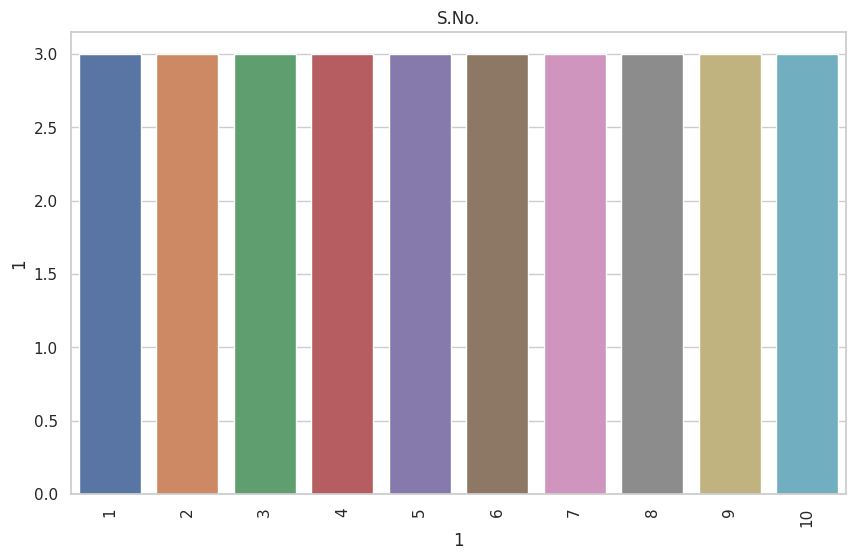

In [28]:
country_count = Counter(df['S.No.'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('S.No.')
plt.xlabel(1)
plt.ylabel(1)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [29]:
df.describe()

,S.No.,BMI,Age,F.O.,B.P.,Religion,Meal,Extra_diet,Aowater,Weight,studyhrs,btofstudy,hhcndtn,x21,x22,x24
count,128.000000,124.000000,125.000000,121.000000,125.000000,125.000000,128.000000,126.000000,127.000000,125.000000,127.000000,128.000000,128.000000,128.000000,125.000000,128.000000
mean,23.726562,22.996774,22.680000,2.413223,2.040000,1.880000,1.789062,2.039683,2.897638,64.576000,4.444882,2.132812,2.382812,3.539062,2.176000,3.078125
std,15.289189,3.058320,2.638426,0.988850,0.865094,0.326269,0.610310,0.880007,0.915776,7.920272,2.252184,1.250959,1.414888,1.536446,0.933809,1.112629
min,1.000000,15.500000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,11.000000,20.900000,21.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,60.000000,2.750000,1.000000,1.000000,2.000000,1.000000,3.000000
50%,22.000000,22.800000,22.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,65.000000,4.000000,2.000000,2.000000,4.000000,2.000000,3.000000
75%,34.250000,24.650000,24.000000,3.000000,3.000000,2.000000,2.000000,2.000000,4.000000,69.000000,6.000000,3.000000,3.000000,5.000000,3.000000,3.250000
max,59.000000,32.300000,30.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,90.000000,8.500000,4.000000,5.000000,5.000000,4.000000,5.000000


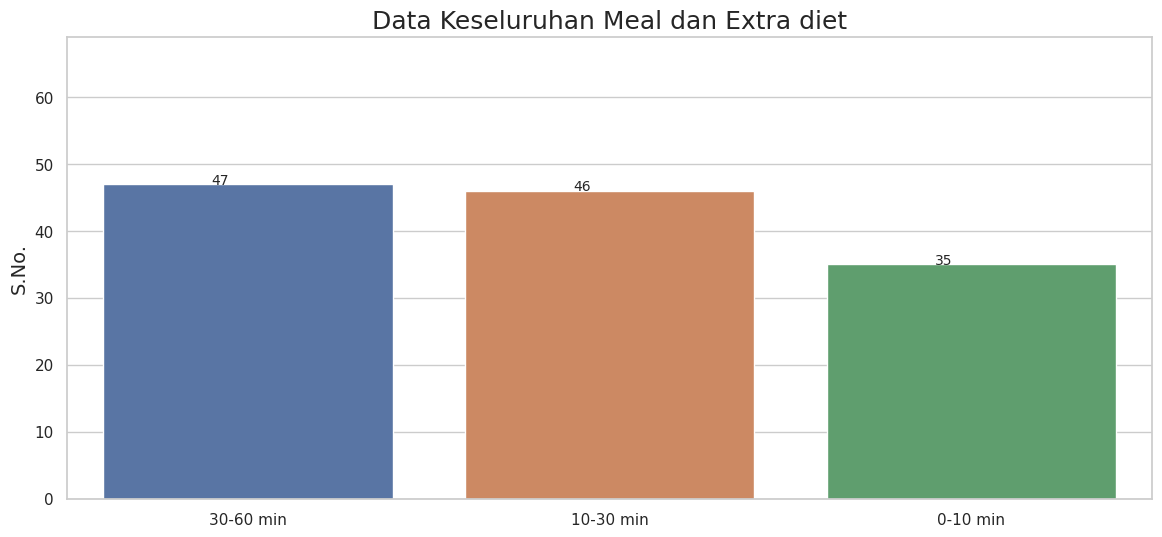

In [30]:
fig, ax = plt.subplots(figsize = (14, 6))
max_width = 13

index = df['Gym'].fillna('0-10 min').value_counts().index[0:4]
count = df['Gym'].fillna('0-10 min').value_counts()[0:4]
sns.barplot(x = index, y = count, order = index)
ax.set_title('Data Keseluruhan Meal dan Extra diet', fontsize = 18)

for i, count in enumerate(count):
    ax.text(x=i-0.1 , y =count+0 , s=f"{count}" , fontdict=dict(fontsize=10))
ax.set_ylabel('S.No.', fontsize = 14)
ax.set_ylim(0, df['Strata'].fillna('0-10 min').value_counts()[0]+10)

plt.show()

#Visualisasi Distribution

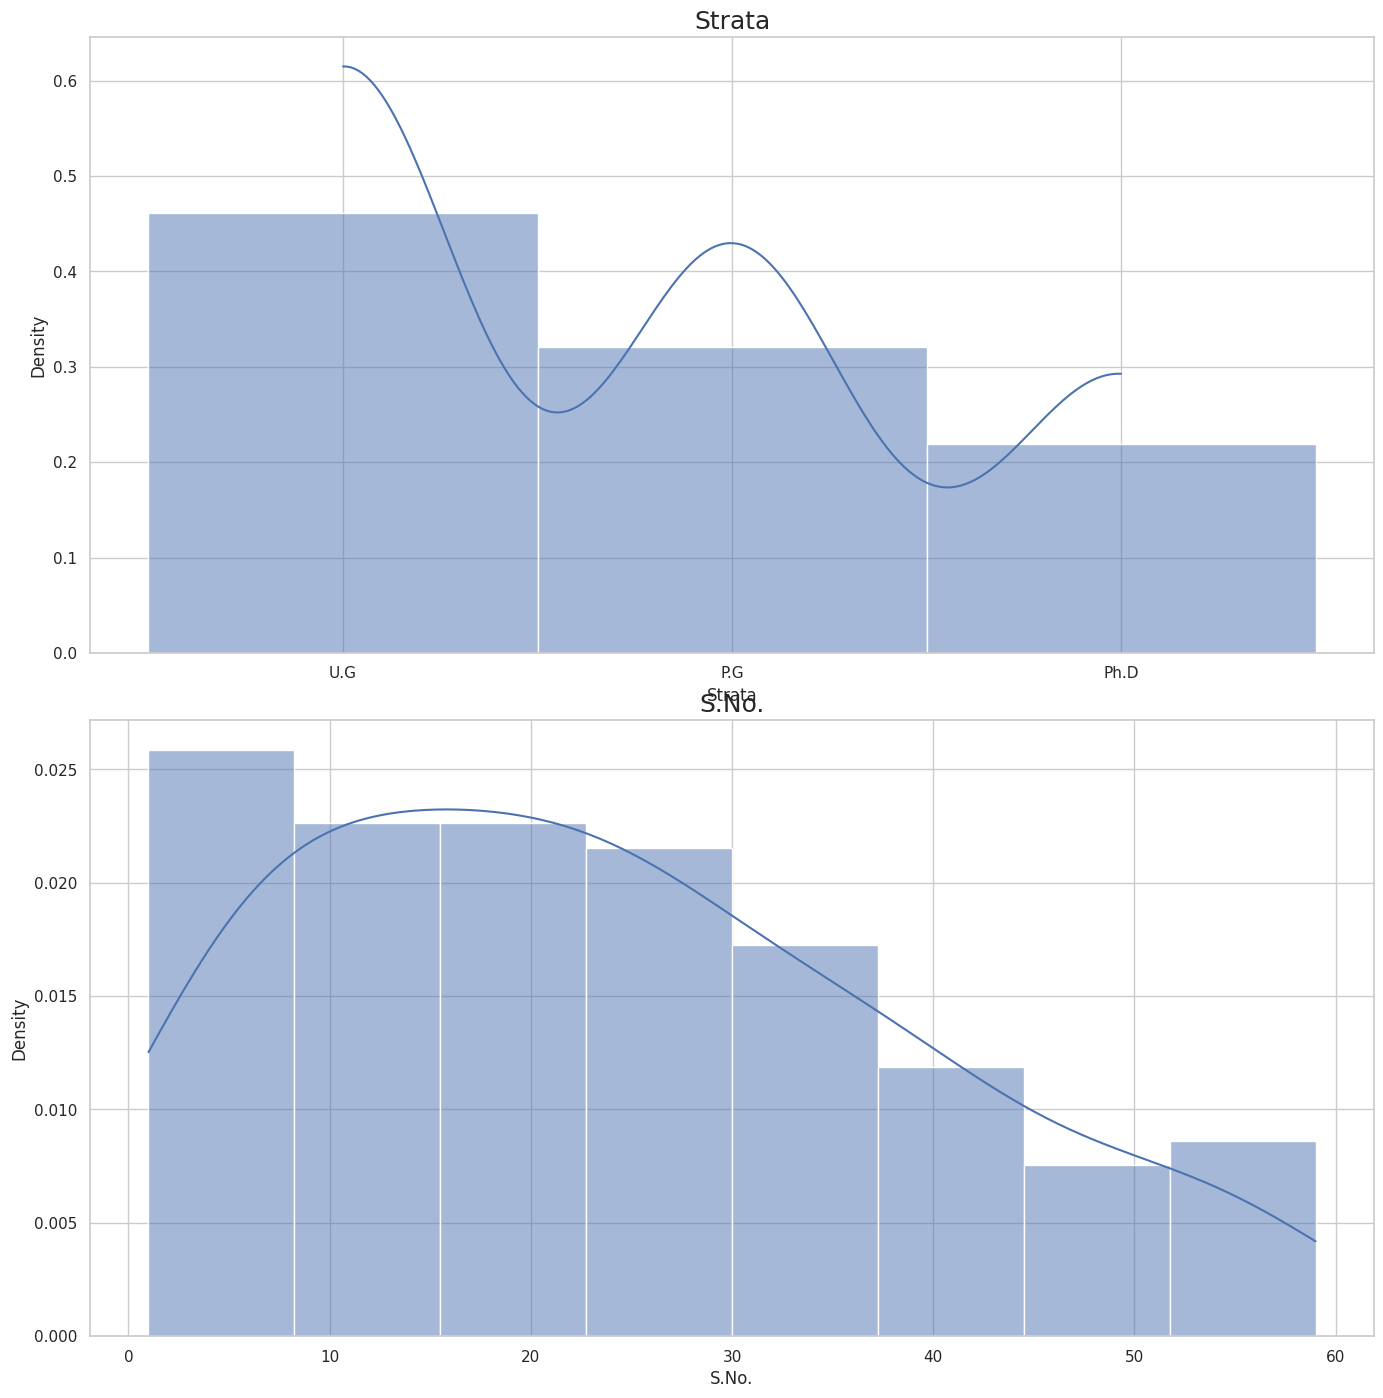

In [31]:
# Mendefinisikan Kolom pada list 
num_cols = ['Strata', 'S.No.']

# Membuat diagram
fig, ax = plt.subplots(2, figsize=(14, 14))
fig.tight_layout(pad=2)

for ax, col in zip(ax.flatten(), num_cols):
    sns.histplot(ax=ax, data=df, x=col, kde=True, stat='density')
    ax.set_title(col, fontsize=18)
    

plt.show()

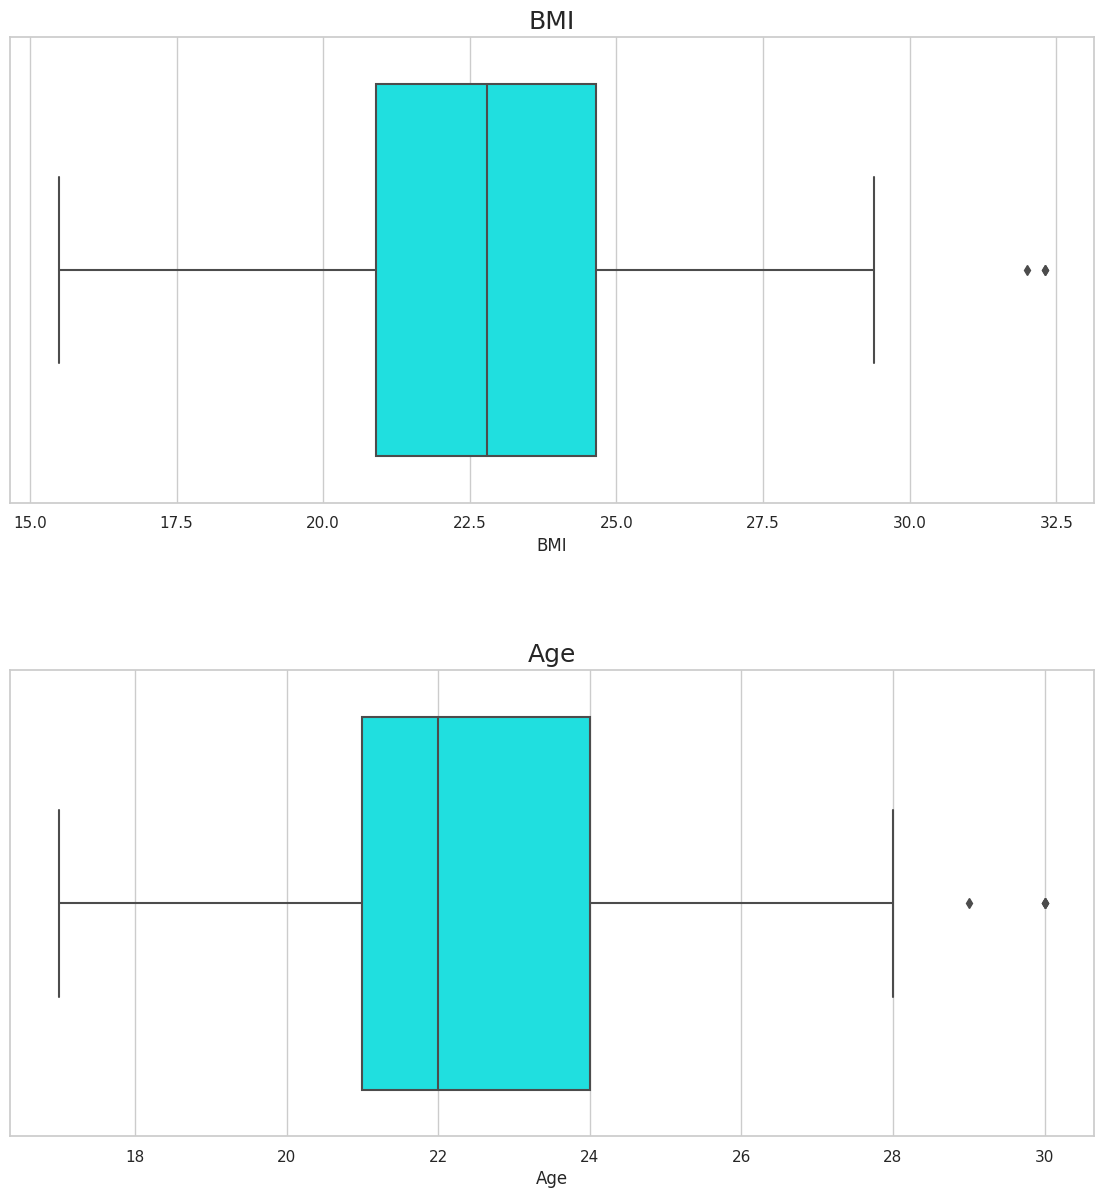

In [33]:
num_cols = ['BMI', 'Age']

fig, ax = plt.subplots(len(num_cols), 1, figsize = (14, 14))
fig.tight_layout(pad = 8)

for i, col in enumerate(num_cols):
    sns.boxplot(ax = ax[i], x = df[col], orient = 'h', color = 'aqua')
    ax[i].set_title(col, fontsize = 18)

plt.show()

#Visualisasi Relationship

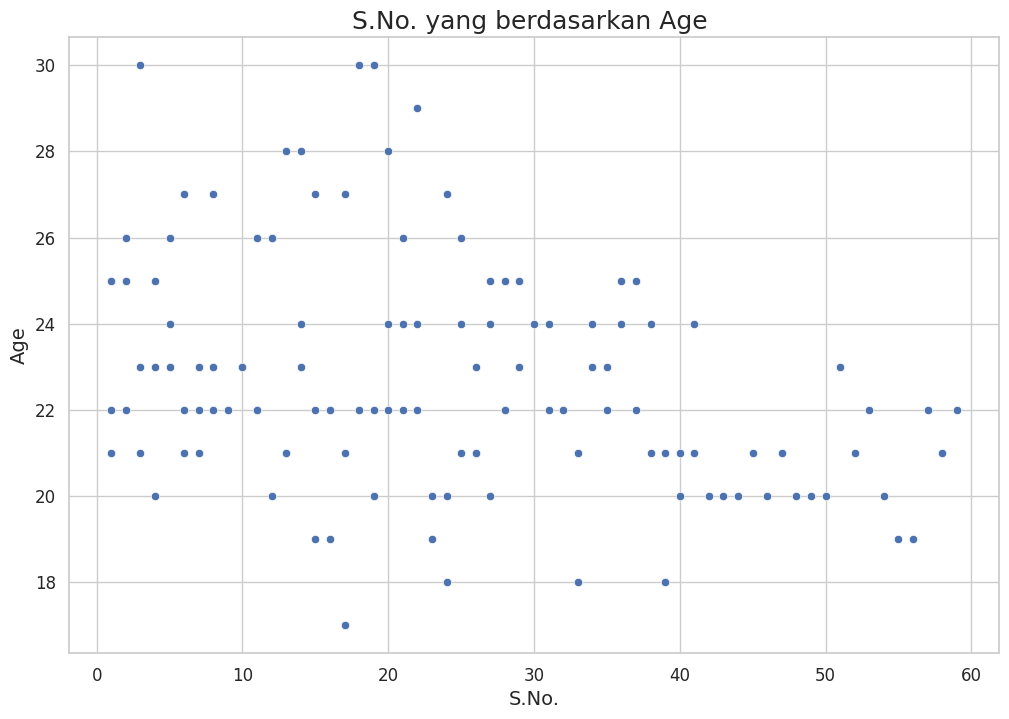

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x="S.No.", y="Age")
ax.set_title('S.No. yang berdasarkan Age ', fontsize=18)
ax.set_xlabel('S.No.', fontsize=14)
ax.set_ylabel('Age', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#Visualisai Composition

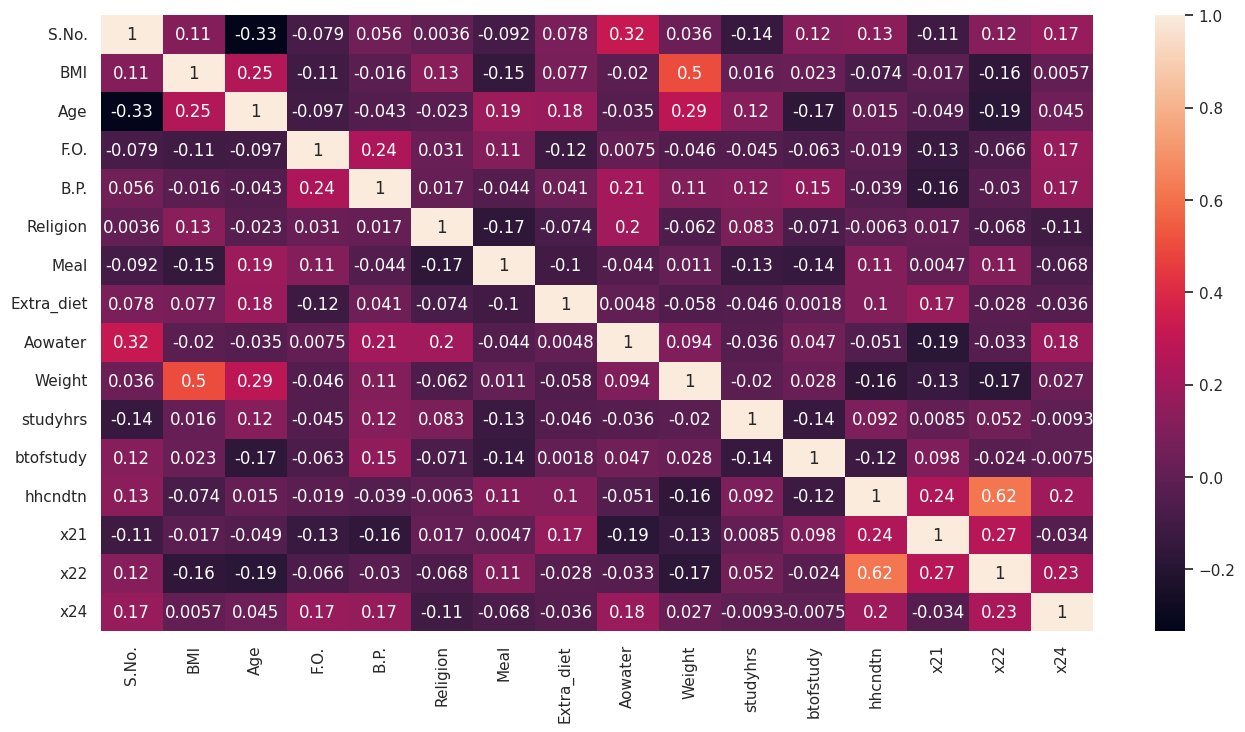

In [38]:
cormat = df.corr()
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(ax = ax, data = cormat, annot = True)
ax.set_yticklabels(cormat.columns, rotation = 0)
plt.show()

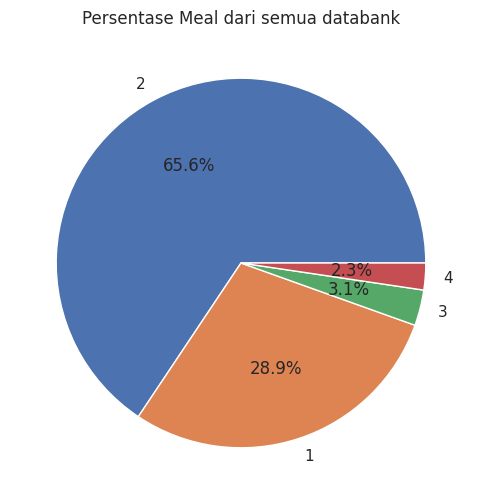

In [40]:
#Kalkulasi count dari setiap Level category
level_count = df['Meal'].value_counts()

#Membuat pie chart untuk Level categories
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(level_count, labels=level_count.index, autopct='%1.1f%%')
ax.set_title('Persentase Meal dari semua databank')
plt.show()

#Verify data quality

In [41]:
# Periksa nilai yang hilang
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Periksa apakah ada duplikat
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Periksa untuk outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

# Periksa data types
print("Data types:\n", df.dtypes)

Missing values:
 Strata               0
S.No.                0
BMI                  4
Age                  3
F.O.                 7
B.P.                 3
Religion             3
Meal                 0
Extra_diet           2
Aowater              1
Watquality           0
Smoke                0
Height               2
Weight               3
sleep_hrs            2
sleep_timing         1
Genetic_Sleep        0
Consume_T&C          1
Snoring              0
sleepinc             5
studyhrs             1
btofstudy            0
gadgetshrs           1
Headache             2
Sleep_prob           0
yearly_treatment     0
hhcndtn              0
x21                  0
x22                  3
Dust                 1
x24                  0
Participate_sport    0
Exercise             0
Gym                  1
dtype: int64
Number of duplicate rows: 0
Outliers:
 Age                   4
Aowater               0
B.P.                  0
BMI                   3
Consume_T&C           0
Dust                  0
Exerc

<ipython-input-41-7d8f5bb30924>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


#Data Preparation
#Select Data

In [43]:
import pandas as pd
df = pd.read_csv("Students.csv")

In [44]:
# Hanya menampikan 2 Kolom
selected_data = df[["Strata", "BMI"]]

# Menampilkan Perintah
print(selected_data.head())

  Strata   BMI
0    U.G  22.5
1    U.G  23.1
2    U.G  20.9
3    U.G  20.2
4    U.G  22.8


In [45]:
# Hanya menampikan 3 Kolom
selected_data = df[["Strata", "BMI", "Age"]]

# Menampilkan Perintah
print(selected_data.head())

  Strata   BMI   Age
0    U.G  22.5  21.0
1    U.G  23.1  22.0
2    U.G  20.9  21.0
3    U.G  20.2  20.0
4    U.G  22.8  24.0


#Clean Data

In [46]:
df.isna().sum()

Strata               0
S.No.                0
BMI                  4
Age                  3
F.O.                 7
B.P.                 3
Religion             3
Meal                 0
Extra_diet           2
Aowater              1
Watquality           0
Smoke                0
Height               2
Weight               3
sleep_hrs            2
sleep_timing         1
Genetic_Sleep        0
Consume_T&C          1
Snoring              0
sleepinc             5
studyhrs             1
btofstudy            0
gadgetshrs           1
Headache             2
Sleep_prob           0
yearly_treatment     0
hhcndtn              0
x21                  0
x22                  3
Dust                 1
x24                  0
Participate_sport    0
Exercise             0
Gym                  1
dtype: int64

In [47]:
df.isna().sum() / len(df) * 100

Strata               0.00000
S.No.                0.00000
BMI                  3.12500
Age                  2.34375
F.O.                 5.46875
B.P.                 2.34375
Religion             2.34375
Meal                 0.00000
Extra_diet           1.56250
Aowater              0.78125
Watquality           0.00000
Smoke                0.00000
Height               1.56250
Weight               2.34375
sleep_hrs            1.56250
sleep_timing         0.78125
Genetic_Sleep        0.00000
Consume_T&C          0.78125
Snoring              0.00000
sleepinc             3.90625
studyhrs             0.78125
btofstudy            0.00000
gadgetshrs           0.78125
Headache             1.56250
Sleep_prob           0.00000
yearly_treatment     0.00000
hhcndtn              0.00000
x21                  0.00000
x22                  2.34375
Dust                 0.78125
x24                  0.00000
Participate_sport    0.00000
Exercise             0.00000
Gym                  0.78125
dtype: float64

In [49]:
df["Strata"] = df["Strata"].fillna(df["Strata"].mode()[0])
df["Age"] = df["Age"].fillna(df["Age"].mode()[0])
df["BMI"] = df["BMI"].fillna(df["BMI"].mode()[0])

df.isna().sum()

Strata               0
S.No.                0
BMI                  0
Age                  0
F.O.                 7
B.P.                 3
Religion             3
Meal                 0
Extra_diet           2
Aowater              1
Watquality           0
Smoke                0
Height               2
Weight               3
sleep_hrs            2
sleep_timing         1
Genetic_Sleep        0
Consume_T&C          1
Snoring              0
sleepinc             5
studyhrs             1
btofstudy            0
gadgetshrs           1
Headache             2
Sleep_prob           0
yearly_treatment     0
hhcndtn              0
x21                  0
x22                  3
Dust                 1
x24                  0
Participate_sport    0
Exercise             0
Gym                  1
dtype: int64

In [50]:
df.isna().sum() / len(df) * 100

Strata               0.00000
S.No.                0.00000
BMI                  0.00000
Age                  0.00000
F.O.                 5.46875
B.P.                 2.34375
Religion             2.34375
Meal                 0.00000
Extra_diet           1.56250
Aowater              0.78125
Watquality           0.00000
Smoke                0.00000
Height               1.56250
Weight               2.34375
sleep_hrs            1.56250
sleep_timing         0.78125
Genetic_Sleep        0.00000
Consume_T&C          0.78125
Snoring              0.00000
sleepinc             3.90625
studyhrs             0.78125
btofstudy            0.00000
gadgetshrs           0.78125
Headache             1.56250
Sleep_prob           0.00000
yearly_treatment     0.00000
hhcndtn              0.00000
x21                  0.00000
x22                  2.34375
Dust                 0.78125
x24                  0.00000
Participate_sport    0.00000
Exercise             0.00000
Gym                  0.78125
dtype: float64

#Construct Data

In [51]:
import pandas as pd
df = pd.read_csv("Students.csv")

In [52]:
# Membuat fitur baru yang akan menghitung selisih dari nilai maksimum dan minimum
df["S.No."] = df["Age"] - df["Meal"]

# Memperlihatkan beberapa baris pertama dari kumpulan data yang dimodifikasi
print(df.head())

  Strata  S.No.   BMI   Age  F.O.  B.P.  Religion  Meal  Extra_diet  Aowater  \
0    U.G   19.0  22.5  21.0   3.0   3.0       2.0     2         2.0      2.0   
1    U.G   21.0  23.1  22.0   2.0   1.0       2.0     1         4.0      2.0   
2    U.G   19.0  20.9  21.0   3.0   3.0       2.0     2         2.0      4.0   
3    U.G   19.0  20.2  20.0   2.0   1.0       2.0     1         1.0      3.0   
4    U.G   22.0  22.8  24.0   1.0   3.0       2.0     2         2.0      3.0   

   ... Sleep_prob     yearly_treatment hhcndtn  x21  x22 Dust x24  \
0  ...       None                Never       2    2  2.0  Yes   1   
1  ...       None  More then two times       2    4  3.0  Yes   3   
2  ...       None                Never       2    4  3.0  Yes   2   
3  ...     Stress             One time       1    5  1.0   No   2   
4  ...       None                Never       2    5  4.0   No   3   

  Participate_sport Exercise        Gym  
0               Yes      Yes  30-60 min  
1                No 

In [53]:
import pandas as pd

# DataFrame (contoh)
data = {'Extra_diet': ['1.0', '2.0', '3.0', '4.0'],
        'Age': [21, 21, 21, 21]}
       

df = pd.DataFrame(data)

# Menghitung umur dari setiap murid di databank
df['Age'] = df['Age'] / ((df['Age'] / 100) ** 2)

# Menghapus kolom yang tidak diperlukan
df = df.drop('Age', axis=1)

# Menampilkan DataFrame setelah Construct Data
print(df)

  Extra_diet
0        1.0
1        2.0
2        3.0
3        4.0


#Format Data

In [ ]:
# Membaca file csv
df = pd.read_csv('Students.csv')

# Menghapus kolom
df = df.drop(['hhcndtn', 'x21'], axis=1)

# Mengganti nilai null dengan nilai rata-rata
mean_value = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_value)

# Mengubah tipe data kolom dari string ke integer
df['Meal'] = df['Meal'].astype(int)

# Menghapus baris duplikat
df = df.drop_duplicates()

# Mengurutkan data berdasarkan kolom
df = df.sort_values('S.No.')

# Menyimpan hasil pengolahan data ke file csv
df.to_csv('data_cleaned.csv', index=False)

#Integrate Data

In [54]:
df = pd.read_csv('Students.csv')

# Integrasi data dengan menambahkan kolom baru
df['BMI'] = df['Age'] + df['Religion']

# Merubah nilai data tertentu
df.loc[df['Extra_diet'] == 'Meal', 'Extra_diet'] = 'nilai_baru'

# Menghapusan kolom yang tidak diperlukan
df = df.drop(['hhcndtn', 'x21', 'x22'], axis=1)

# Menyimpan dataset yang telah diubah
df.to_csv('integrity data.csv', index=False)

print("successfully created a new dataset and added 1 new column, namely ")

successfully created a new dataset and added 1 new column, namely 
